In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import scipy
import scipy.signal
import glob
sys.path.append( '/home/ugrads/c/clearloveyanzhen/CufflessBP/bioz_processing' )
import sicong_util as su
import sicong_duck_path as sp
import sicong_duck_path as sdp

In [8]:
file_list=su.export_bioz_mat_to_dict()[0]
finapres_dict = su.export_finapres_to_dict()[0]
mat_obj = scipy.io.loadmat(file_list['A']['01']['11_29_43'][0])
fprs_obj = pd.read_csv(finapres_dict['A']['01']['11_29_43'][0])

In [22]:
mat_obj['XL_Board'][0][0]['all'][0][0]['ms_t'][:30,0], mat_obj['XL_Board'][0][0]['all'][0][0]['ms_t'][:30,-1]

(array([ 1.299072  ,  2.13845333,  2.97489067,  3.84388267,  4.73339733,
         5.606016  ,  6.496896  ,  7.35620267,  8.21717333,  9.04341333,
         9.84247467, 10.62788267, 11.47741867, 12.37794133, 13.272448  ,
        14.12817067, 14.97092267, 15.79025067, 16.624128  , 17.46210133,
        18.293248  , 18.293248  , 19.39136   , 20.06890667, 20.95125333,
        22.088704  , 22.77521067, 23.48526933, 24.21243733, 24.97284267]),
 array([ 1.34199467,  2.17911467,  3.01508267,  3.887488  ,  4.77141333,
         5.64565333,  6.53469867,  7.39771733,  8.25800533,  9.08565333,
         9.88245333, 10.672128  , 11.51872   , 12.41911467, 13.31170133,
        14.16430933, 15.005056  , 15.82848   , 16.66589867, 17.50190933,
        18.33672533, 19.12930133, 19.922688  , 20.66990933, 21.40974933,
        22.128128  , 22.81531733, 23.52273067, 24.255488  , 25.01175467]))

In [21]:
fprs_obj['time (synced to ppg)'].tolist()[1:10]

[1.341994666666667,
 2.176994666666703,
 3.046894666666676,
 3.936794666666687,
 4.811694666666655,
 5.7016946666666986,
 6.571594666666671,
 7.421494666666662,
 8.256394666666667]

In [4]:
mat_obj['XL_Board'][0][0]['bioz']['dz'][0][1][:,0]

array([0.00803508, 0.00803407, 0.00803305, ..., 0.00745288, 0.00745384,
       0.0074548 ])

In [5]:
data_dir = '/home/data/datasets/sicong_bioz_bp/75-1_75A/'
sessions = sorted(next(os.walk(data_dir))[1])
session='session01_0225-2021'
mat_files = sorted(glob.glob(data_dir + session + '/test01*.mat'))
m='/home/data/datasets/sicong_bioz_bp/75-1_75A/session01_0225-2021/test01-20210225 11_29_43.mat'

In [ ]:
len_beat=3
sample_res=300

In [4]:
def convert_to_table(mat_obj, fprs_obj, len_beat=3, sample_res=300):
    ppg_ms_t = mat_obj['XL_Board'][0][0]['all'][0][0]['ms_t'][:3,-1]
    
    t_dv = mat_obj['XL_Board'][0][0]['ppg'][0][0]['t_dv'][:,0]
    ch1_dz = mat_obj['XL_Board'][0][0]['bioz'][0][0]['dz'][:,0]
    ch2_dz = mat_obj['XL_Board'][0][0]['bioz'][0][1]['dz'][:,0]

    ch1_ms_t = mat_obj['XL_Board'][0][0]['all'][0][0]['ms_t'][:,0]
    ch2_ms_t = mat_obj['XL_Board'][0][0]['all'][0][0]['ms_t'][:,1]
    ch1_ms_a = mat_obj['XL_Board'][0][0]['all'][0][0]['ms_a'][:,0]
    ch2_ms_a = mat_obj['XL_Board'][0][0]['all'][0][0]['ms_a'][:,1]

    ch1_ft_t = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_t'][:,0]
    ch2_ft_t = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_t'][:,1]
    ch1_ft_a = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_a'][:,0]
    ch2_ft_a = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_a'][:,1]

    ch1_pk_t = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_t'][:,0]
    ch2_pk_t = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_t'][:,1]
    ch1_pk_a = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_a'][:,0]
    ch2_pk_a = mat_obj['XL_Board'][0][0]['all'][0][0]['pk_a'][:,1]

    ch1_ip_t = mat_obj['XL_Board'][0][0]['all'][0][0]['ip_t'][:,0]
    ch2_ip_t = mat_obj['XL_Board'][0][0]['all'][0][0]['ip_t'][:,1]
    ch1_ip_a = mat_obj['XL_Board'][0][0]['all'][0][0]['ip_a'][:,0]
    ch2_ip_a = mat_obj['XL_Board'][0][0]['all'][0][0]['ip_a'][:,1]
    
    num_beats = len(ch1_pk_t)
    
    ptt_mst = ch2_ms_t[1:] - ch1_ms_t[1:]
    ch1_ms_ibi=ch1_ms_t[1:] - ch1_ms_t[:-1]
    ch1_dia_to_ms_td = ch1_ms_t[1:] - ch1_pk_t[:-1]
    ch1_dia_to_sys_td = ch1_ft_t[1:] - ch1_pk_t[:-1]
    ch1_dia_to_ip_td = ch1_ip_t[1:] - ch1_pk_t[:-1]
    ch1_dia_to_ms_ad = ch1_ms_a[1:] - ch1_pk_a[:-1]
    ch1_dia_to_sys_ad = ch1_ft_a[1:] - ch1_pk_a[:-1]
    ch1_dia_to_ip_ad = ch1_ip_a[1:] - ch1_pk_a[:-1]
    ch2_ms_ibi=ch2_ms_t[1:] - ch2_ms_t[:-1]
    ch2_dia_to_ms_td = ch2_ms_t[1:] - ch2_pk_t[:-1]
    ch2_dia_to_sys_td = ch2_ft_t[1:] - ch2_pk_t[:-1]
    ch2_dia_to_ip_td = ch2_ip_t[1:] - ch2_pk_t[:-1]
    ch2_dia_to_ms_ad = ch2_ms_a[1:] - ch2_pk_a[:-1]
    ch2_dia_to_sys_ad = ch2_ft_a[1:] - ch2_pk_a[:-1]
    ch2_dia_to_ip_ad = ch2_ip_a[1:] - ch2_pk_a[:-1]

    ch1_dia_to_ms_integrate = []
    ch1_dia_to_sys_integrate = []
    ch1_dia_to_ip_integrate = []
    ch1_dia_to_dia2_integrate = []
    ch2_dia_to_ms_integrate = []
    ch2_dia_to_sys_integrate = []
    ch2_dia_to_ip_integrate = []
    ch2_dia_to_dia2_integrate = []
    for i in range(num_beats-1):
        ch1_dia_to_ms_int = np.trapz(y=ch1_dz[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ms_t[i+1])],x=t_dv[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ms_t[i+1])])
        ch1_dia_to_sys_int = np.trapz(y=ch1_dz[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ft_t[i+1])],x=t_dv[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ft_t[i+1])])
        ch1_dia_to_ip_int = np.trapz(y=ch1_dz[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ip_t[i+1])],x=t_dv[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ip_t[i+1])])
        ch1_dia_to_dia2_int = np.trapz(y=ch1_dz[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_pk_t[i+1])],x=t_dv[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_pk_t[i+1])])
        ch2_dia_to_ms_int = np.trapz(y=ch2_dz[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_ms_t[i+1])],x=t_dv[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_ms_t[i+1])])
        ch2_dia_to_sys_int = np.trapz(y=ch2_dz[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_ft_t[i+1])],x=t_dv[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_ft_t[i+1])])
        ch2_dia_to_ip_int = np.trapz(y=ch2_dz[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_ip_t[i+1])],x=t_dv[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_ip_t[i+1])])
        ch2_dia_to_dia2_int = np.trapz(y=ch2_dz[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_pk_t[i+1])],x=t_dv[(t_dv >= ch2_pk_t[i])&(t_dv <=ch2_pk_t[i+1])])

        ch1_dia_to_ms_integrate.append(ch1_dia_to_ms_int)
        ch1_dia_to_sys_integrate.append(ch1_dia_to_sys_int)
        ch1_dia_to_ip_integrate.append(ch1_dia_to_ip_int)
        ch1_dia_to_dia2_integrate.append(ch1_dia_to_dia2_int)
        ch2_dia_to_ms_integrate.append(ch2_dia_to_ms_int)
        ch2_dia_to_sys_integrate.append(ch2_dia_to_sys_int)
        ch2_dia_to_ip_integrate.append(ch2_dia_to_ip_int)
        ch2_dia_to_dia2_integrate.append(ch2_dia_to_dia2_int)

    ch1_dia_to_ms_integrate = np.array(ch1_dia_to_ms_integrate)
    ch1_dia_to_sys_integrate = np.array(ch1_dia_to_sys_integrate)
    ch1_dia_to_ip_integrate = np.array(ch1_dia_to_ip_integrate)
    ch1_dia_to_dia2_integrate = np.array(ch1_dia_to_dia2_integrate)
    ch2_dia_to_ms_integrate = np.array(ch2_dia_to_ms_integrate)
    ch2_dia_to_sys_integrate = np.array(ch2_dia_to_sys_integrate)
    ch2_dia_to_ip_integrate = np.array(ch2_dia_to_ip_integrate)
    ch2_dia_to_dia2_integrate = np.array(ch2_dia_to_dia2_integrate)

#     Example of this reshape: df['asd']=np.arange(3070).reshape(307, -1).tolist()
    t_dv = scipy.signal.resample(t_dv, num_beats*sample_res).reshape(num_beats, sample_res)[1:,:]
    ch1_dz = scipy.signal.resample(ch1_dz, num_beats*sample_res).reshape(num_beats, sample_res)[1:,:]
    ch2_dz = scipy.signal.resample(ch2_dz, num_beats*sample_res).reshape(num_beats, sample_res)[1:,:]

    # ch1_dz[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ms_t[i+1])].shape, t_dv[(t_dv >= ch1_pk_t[i])&(t_dv <=ch1_ms_t[i+1])].shape
    feature_names = ['ptt_mst', 'ch1_ms_ibi', 'ch1_dia_to_ms_td', 'ch1_dia_to_sys_td', 'ch1_dia_to_ip_td', 'ch1_dia_to_ms_ad', 'ch1_dia_to_sys_ad', 'ch1_dia_to_ip_ad',
                             'ch2_ms_ibi', 'ch2_dia_to_ms_td', 'ch2_dia_to_sys_td', 'ch2_dia_to_ip_td', 'ch2_dia_to_ms_ad', 'ch2_dia_to_sys_ad', 'ch2_dia_to_ip_ad',
                                 'ch1_dia_to_ms_integrate', 'ch1_dia_to_sys_integrate', 'ch1_dia_to_ip_integrate', 'ch1_dia_to_dia2_integrate',
                                     'ch2_dia_to_ms_integrate', 'ch2_dia_to_sys_integrate', 'ch2_dia_to_ip_integrate', 'ch2_dia_to_dia2_integrate']
    features = np.array([ptt_mst, ch1_ms_ibi, ch1_dia_to_ms_td, ch1_dia_to_sys_td, ch1_dia_to_ip_td, ch1_dia_to_ms_ad, ch1_dia_to_sys_ad, ch1_dia_to_ip_ad,
                             ch2_ms_ibi, ch2_dia_to_ms_td, ch2_dia_to_sys_td, ch2_dia_to_ip_td, ch2_dia_to_ms_ad, ch2_dia_to_sys_ad, ch2_dia_to_ip_ad,
                                 ch1_dia_to_ms_integrate, ch1_dia_to_sys_integrate, ch1_dia_to_ip_integrate, ch1_dia_to_dia2_integrate,
                                     ch2_dia_to_ms_integrate, ch2_dia_to_sys_integrate, ch2_dia_to_ip_integrate, ch2_dia_to_dia2_integrate], dtype=object)


    df = pd.DataFrame(features.T, columns = feature_names)
    df['t_dv']=t_dv.tolist()
    df['ch1_dz']=ch1_dz.tolist()
    df['ch2_dz']=ch2_dz.tolist()

    return df

In [ ]:
file_list=su.export_bioz_mat_to_dict()[0]
for pname in su.subject_list[6:-2]:
    bf = ''
    for session in file_list[pname]:
        print(f'Processing Subject {pname}; Session {session}')
        for trial in file_list[pname][session]:
            for file in file_list[pname][session][trial]:
                mat_obj = scipy.io.loadmat(file)
                save_path = file[:-4]+'.morph_csv'
                df = convert_to_table(mat_obj)
                df.to_csv(save_path, index=False)
                bf += save_path + '\n'
    su.email_func(subject='Python Finished Tabular of a Subject', message=f'Finished with Tabular data of Subject {pname}\n{bf}')


Processing Subject F; Session 01
Processing Subject F; Session 02
Processing Subject F; Session 03
Processing Subject F; Session 04
Processing Subject F; Session 05
Processing Subject F; Session 06


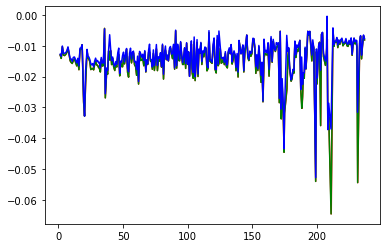

In [123]:
plt.plot(mat_obj['XL_Board'][0][0]['all'][0][0]['pk_t'][:,0], mat_obj['XL_Board'][0][0]['all'][0][0]['pk_a'][:,0], 'r')
plt.plot(mat_obj['XL_Board'][0][0]['all'][0][0]['linpk_t'][:,0], mat_obj['XL_Board'][0][0]['all'][0][0]['linpk_a'][:,0], 'g')
plt.plot(mat_obj['XL_Board'][0][0]['all'][0][0]['pk2_t'][:,0], mat_obj['XL_Board'][0][0]['all'][0][0]['pk2_a'][:,0], 'b')

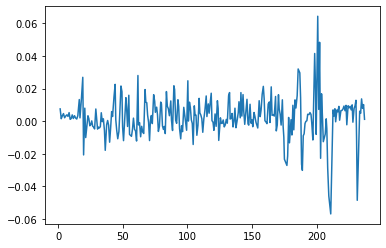

In [124]:
plt.plot(mat_obj['XL_Board'][0][0]['all'][0][0]['ip_t'][:,0], mat_obj['XL_Board'][0][0]['all'][0][0]['ip_a'][:,0])

In [185]:
X = []
y = []
for session in data_dict:
    for trial in data_dict[session]:
        for i, feats in enumerate(data_dict[session][trial]['feats'][2:]):
            X.append(np.concatenate((data_dict[session][trial]['feats'][i-2],data_dict[session][trial]['feats'][i-1],data_dict[session][trial]['feats'][i]),axis=0))
            y.append([data_dict[session][trial]['sbp'][i], data_dict[session][trial]['dbp'][i]])
X=np.array(X)
y=np.array(y)
np.save('/home/ugrads/c/clearloveyanzhen/CufflessBP/subject_variance_analysis/X_file 75A morph.npy', X)
np.save('/home/ugrads/c/clearloveyanzhen/CufflessBP/subject_variance_analysis/y_file 75A morph.npy', y)

In [177]:
data_dict[session][trial].keys()

dict_keys(['x', 'feats', 'dbp', 'sbp', 'tm'])

In [183]:
(data_dict[session][trial]['feats'][i-2]+data_dict[session][trial]['feats'][i-1]).shape

(23,)